In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

Bank Marketing: The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).
Attribute information

For more information, read [Moro et al., 2011]. Input variables:- bank client data:

1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur", "student","bluecollar","self-employed","retired","technician","services")

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")

related with the last contact of the current campaign:

9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)
other attributes:

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
Bank-Marketing

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

output variable (desired target):

17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [6]:
df=pd.read_csv('C:\\Users\\Dell\\Downloads\\Bank_Marketing_Data_Set.csv')
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,Class
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1


In [12]:
df=df.rename(columns={"V1":"age","V2":"job_type","V3":"marital","V4":"education","V5":"default","V6":"balance","V7":"housing_loan","V8":"personal_loan","V9":"contact","V10":"day","V11":"month","V12":"duration","V13":"campaign","V14":"pdays","V15":"previous","V16":"poutcome"})
df.head()

,age,job_type,marital,education,default,balance,housing_loan,personal_loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Class
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45211 non-null  int64 
 1   job_type       45211 non-null  object
 2   marital        45211 non-null  object
 3   education      45211 non-null  object
 4   default        45211 non-null  object
 5   balance        45211 non-null  int64 
 6   housing_loan   45211 non-null  object
 7   personal_loan  45211 non-null  object
 8   contact        45211 non-null  object
 9   day            45211 non-null  int64 
 10  month          45211 non-null  object
 11  duration       45211 non-null  int64 
 12  campaign       45211 non-null  int64 
 13  pdays          45211 non-null  int64 
 14  previous       45211 non-null  int64 
 15  poutcome       45211 non-null  object
 16  Class          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [5]:
df["Class"]=df["Class"].replace({1:0,2:1})

In [6]:
df.isnull().sum()

age              0
job_type         0
marital          0
education        0
default          0
balance          0
housing_loan     0
personal_loan    0
contact          0
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome         0
Class            0
dtype: int64

In [ ]:
df.shape

(45211, 17)

In [13]:
num_df=df.select_dtypes(include=np.number).drop("Class",1)
cat_df=df.select_dtypes(include="object")

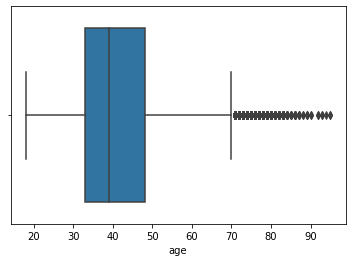

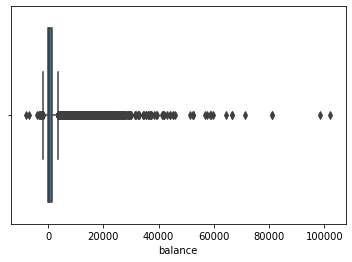

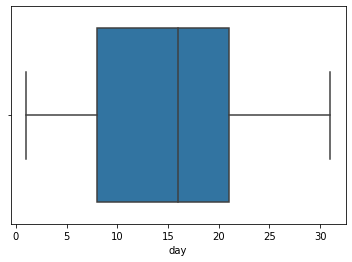

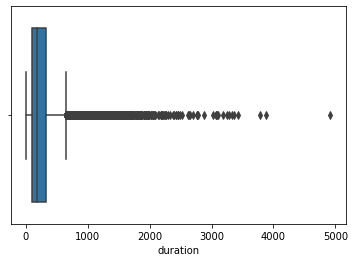

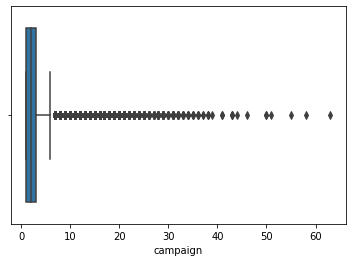

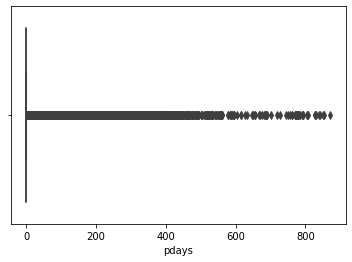

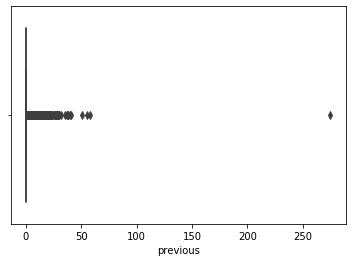

In [14]:
for i in num_df:
    sns.boxplot(num_df[i])
    plt.show()

In [ ]:
num_df.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [15]:
df.pdays.value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

# pdays

In [8]:

def contected(i):
    if i==-1:
        return "not_contacted"
    else:
        return "contacted"
        
df.pdays=df.pdays.apply(contected)


In [9]:
df.head()

,age,job_type,marital,education,default,balance,housing_loan,personal_loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Class
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,not_contacted,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,not_contacted,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,not_contacted,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,not_contacted,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,not_contacted,0,unknown,0


In [10]:
df.shape

(45211, 17)

# previous

In [11]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3=q1
lb=q1-iqr*1.5
ub=q3+iqr*1.5
len(df[(df>lb)&(df<ub)])

45211

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


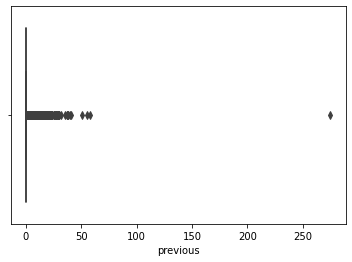

In [12]:
sns.boxplot(df.previous)

In [13]:
df=df[df.previous<=100]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


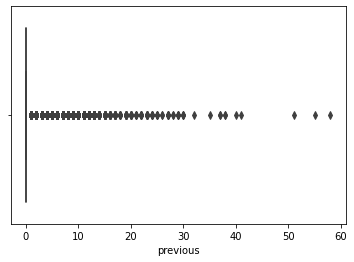

In [14]:
sns.boxplot(df.previous)

# campaign

In [15]:
df.campaign.value_counts()

1     17544
2     12504
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
23       22
25       22
24       20
28       16
29       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
41        2
50        2
37        2
51        1
55        1
46        1
58        1
44        1
39        1
63        1
Name: campaign, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


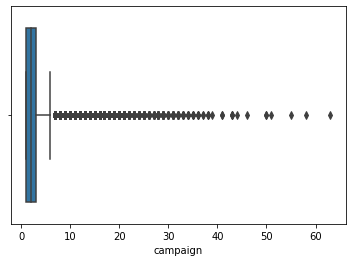

In [16]:
sns.boxplot(df.campaign)

In [17]:
df=df[df.campaign<=10]

In [18]:
df.shape

(44014, 17)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


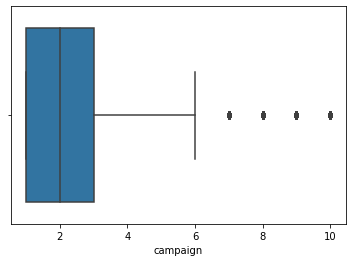

In [19]:
sns.boxplot(df.campaign)

# duration

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


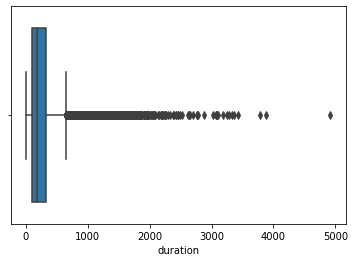

In [20]:
sns.boxplot(df.duration)

In [21]:
df=df[df.duration<2000]

In [22]:
df.shape

(43955, 17)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


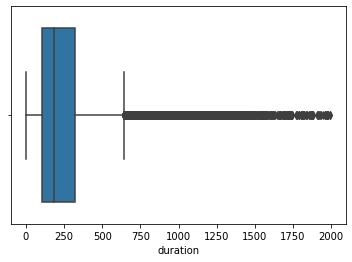

In [23]:
sns.boxplot(df.duration)

# balance

In [24]:
df.balance.value_counts()

0        3375
1         188
2         147
4         135
3         125
         ... 
13774       1
9676        1
6353        1
9881        1
10114       1
Name: balance, Length: 7092, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


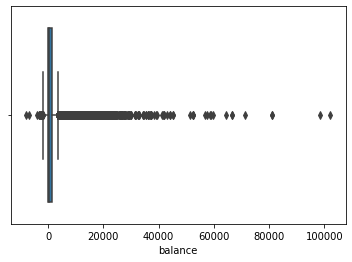

In [25]:
sns.boxplot(df.balance)

In [26]:
df=df[(df.balance>-1000) & (df.balance<5000)]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


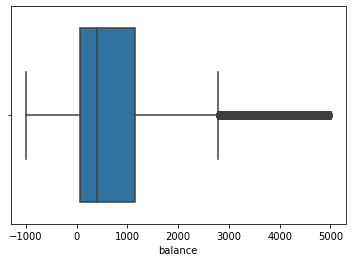

In [27]:
sns.boxplot(df.balance)

In [28]:
df.shape

(41035, 17)

# age

In [29]:
df.age.value_counts()

32    1899
33    1822
31    1818
34    1758
35    1749
      ... 
90       2
92       2
93       2
94       1
95       1
Name: age, Length: 77, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


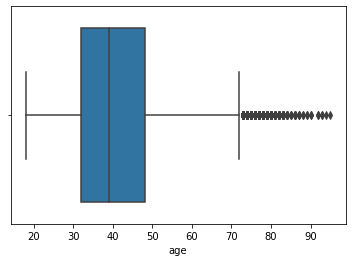

In [30]:
sns.boxplot(df.age)

In [31]:
df=df[df.age<80]

In [32]:
df.shape

(40927, 17)

In [33]:
df=df.reset_index(drop=True)
df

,age,job_type,marital,education,default,balance,housing_loan,personal_loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Class
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,not_contacted,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,not_contacted,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,not_contacted,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,not_contacted,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,not_contacted,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40922,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,not_contacted,0,unknown,1
40923,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,not_contacted,0,unknown,1
40924,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,not_contacted,0,unknown,1
40925,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,not_contacted,0,unknown,0


# cat columns

In [34]:
df.head()

,age,job_type,marital,education,default,balance,housing_loan,personal_loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Class
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,not_contacted,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,not_contacted,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,not_contacted,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,not_contacted,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,not_contacted,0,unknown,0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


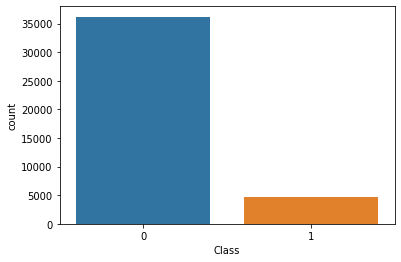

In [35]:
sns.countplot(df.Class)

In [36]:
df.dtypes

age               int64
job_type         object
marital          object
education        object
default          object
balance           int64
housing_loan     object
personal_loan    object
contact          object
day               int64
month            object
duration          int64
campaign          int64
pdays            object
previous          int64
poutcome         object
Class             int64
dtype: object

In [37]:
num_df=df.select_dtypes(include=np.number)
cat_df=df.select_dtypes(include="object")

In [38]:
num_df.head()

,age,balance,day,duration,campaign,previous,Class
0,58,2143,5,261,1,0,0
1,44,29,5,151,1,0,0
2,33,2,5,76,1,0,0
3,47,1506,5,92,1,0,0
4,33,1,5,198,1,0,0


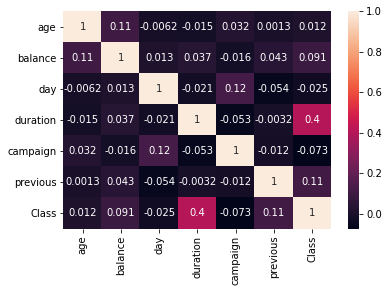

In [39]:
sns.heatmap(num_df.corr(),annot=True)

In [40]:
cat_df.head()

,job_type,marital,education,default,housing_loan,personal_loan,contact,month,pdays,poutcome
0,management,married,tertiary,no,yes,no,unknown,may,not_contacted,unknown
1,technician,single,secondary,no,yes,no,unknown,may,not_contacted,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,not_contacted,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,may,not_contacted,unknown
4,unknown,single,unknown,no,no,no,unknown,may,not_contacted,unknown


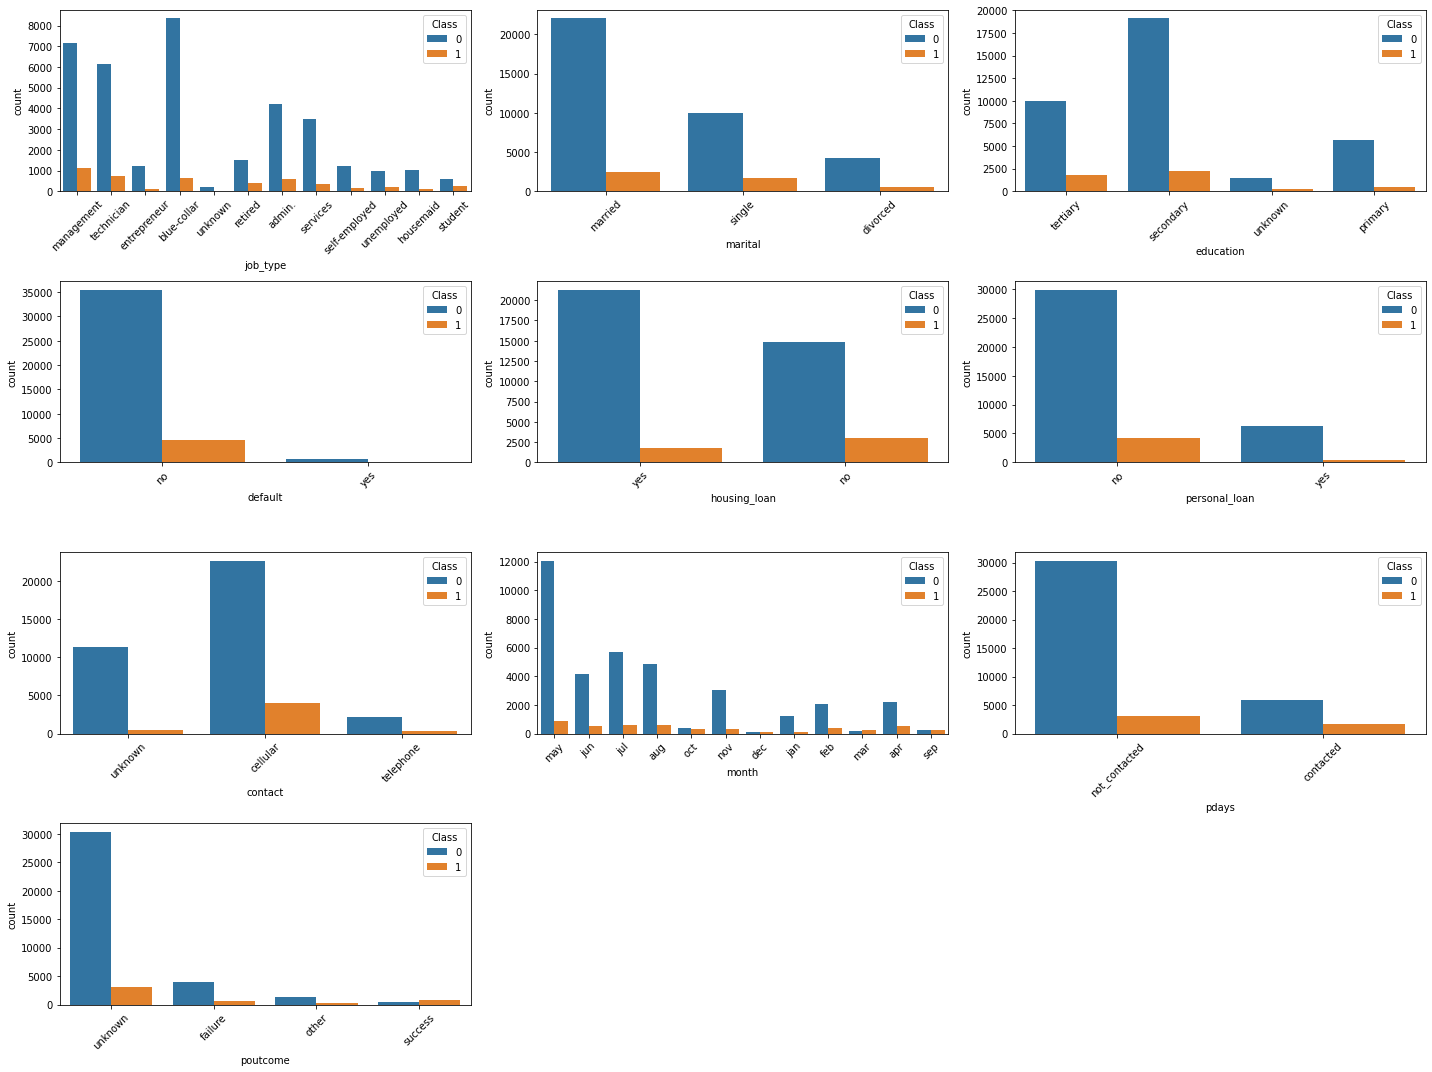

In [41]:
plt.figure(figsize=(20,15), facecolor='white')
k =1
for feature in cat_df.columns:
    ax = plt.subplot(4,3,k)
    sns.countplot(x=feature,data=cat_df,hue=df["Class"])
    plt.xticks(rotation=45)
  
    k+=1
    
plt.tight_layout()
plt.show()


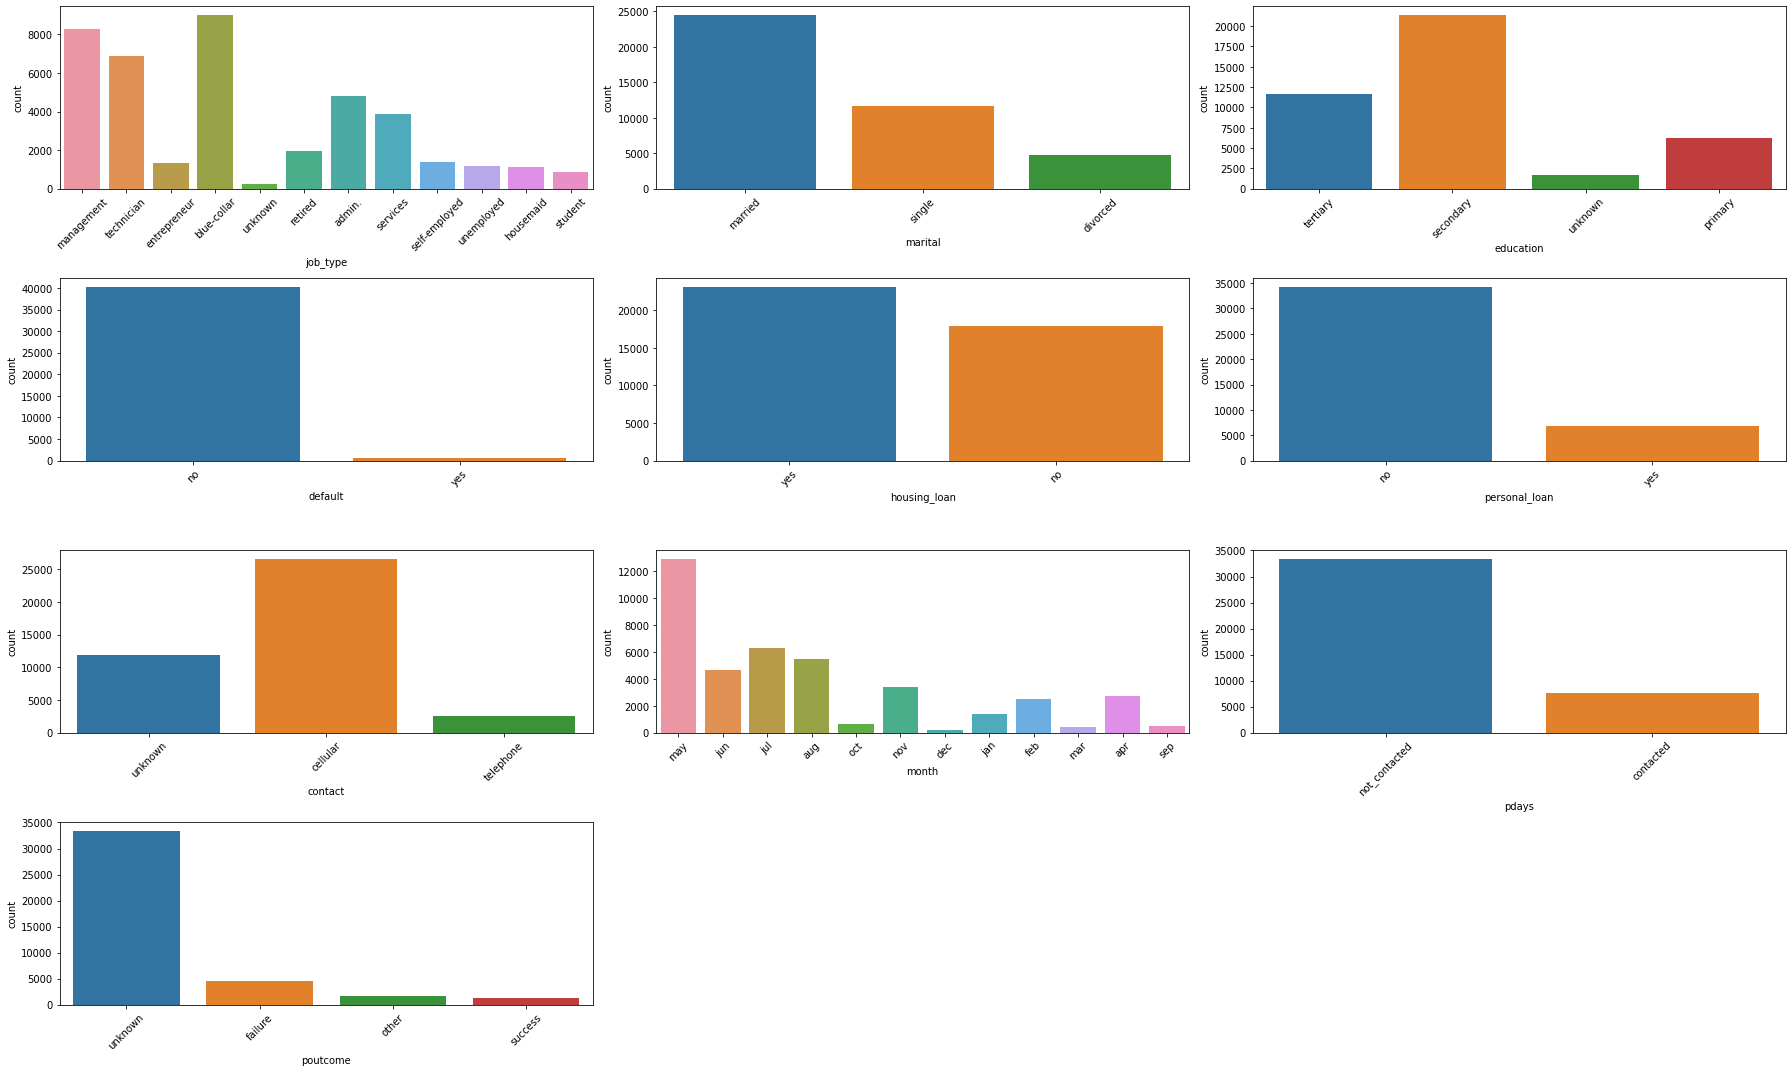

In [42]:
plt.figure(figsize=(25,15), facecolor='white')
k =1
for feature in cat_df.columns:
    ax = plt.subplot(4,3,k)
    sns.countplot(x=feature,data=cat_df)
    plt.xticks(rotation=45)
    k+=1
plt.tight_layout()
plt.show()

In [45]:
num_df.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'previous'], dtype='object')

In [46]:

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
num_df=pd.DataFrame(sc.fit_transform(num_df),columns=num_df.columns)
num_df.head()

,age,balance,day,duration,campaign,previous
0,1.677402,1.220546,-1.279904,0.018020,-0.781979,-0.304948
1,0.324608,-0.707582,-1.279904,-0.437001,-0.781979,-0.304948
2,-0.738302,-0.732208,-1.279904,-0.747243,-0.781979,-0.304948
3,0.614492,0.639554,-1.279904,-0.681058,-0.781979,-0.304948
4,-0.738302,-0.733120,-1.279904,-0.242583,-0.781979,-0.304948


In [47]:
cat_df=pd.get_dummies(cat_df,drop_first=True)
cat_df.head()

,job_type_blue-collar,job_type_entrepreneur,job_type_housemaid,job_type_management,job_type_retired,job_type_self-employed,job_type_services,job_type_student,job_type_technician,job_type_unemployed,job_type_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_loan_yes,personal_loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,pdays_not_contacted,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
2,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1


In [48]:
df_final=pd.concat([num_df,cat_df,df.Class],1)

In [49]:
df_final.head()

,age,balance,day,duration,campaign,previous,job_type_blue-collar,job_type_entrepreneur,job_type_housemaid,job_type_management,job_type_retired,job_type_self-employed,job_type_services,job_type_student,job_type_technician,job_type_unemployed,job_type_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_loan_yes,personal_loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,pdays_not_contacted,poutcome_other,poutcome_success,poutcome_unknown,Class
0,1.677402,1.220546,-1.279904,0.018020,-0.781979,-0.304948,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
1,0.324608,-0.707582,-1.279904,-0.437001,-0.781979,-0.304948,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
2,-0.738302,-0.732208,-1.279904,-0.747243,-0.781979,-0.304948,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
3,0.614492,0.639554,-1.279904,-0.681058,-0.781979,-0.304948,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,-0.738302,-0.733120,-1.279904,-0.242583,-0.781979,-0.304948,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0


In [50]:
X=df_final.drop("Class",1)

y=df["Class"]
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [51]:
df["Class"]

0        0
1        0
2        0
3        0
4        0
        ..
40922    1
40923    1
40924    1
40925    0
40926    0
Name: Class, Length: 40927, dtype: int64

In [55]:
from matplotlib.colors import ListedColormap

In [56]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model):
    
    # predict the target values using X_test
    y_pred = model.predict(x_test)
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = metrics.confusion_matrix(y_test, y_pred)
    #tn=cm[0,0]
    #tp=cm[1,1]
    #fp=cm[0,1]
    #fn=cm[1,0]
    print("F1 Score=",metrics.f1_score(y_test,y_pred))
    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    # plot a heatmap to visualize the confusion matrix
    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

In [57]:
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc(model):
    
    # predict the probability of target variable using X_test
    # consider the probability of positive class by subsetting with '[:,1]'
    y_pred_prob = model.predict_proba(x_test)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve for Cancer Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(metrics.roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

In [58]:
from sklearn.model_selection import GridSearchCV, KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

def performance_measures(model,X_train,Y_train, store_results=True):
    
    test_acc = cross_val_score(model, X_train, Y_train, cv=kf, n_jobs=-1, scoring='accuracy')
    test_acc = np.around(test_acc, decimals=4)
    test_f1 = cross_val_score(model, X_train, Y_train, cv=kf, n_jobs=-1, scoring='f1')
    test_f1 = np.around(test_f1, decimals=4)
    test_auc = cross_val_score(model, X_train, Y_train, cv=kf, n_jobs=-1, scoring='roc_auc')
    test_auc = np.around(test_auc, decimals=4)
    mean_test_acc = np.around(np.mean(test_acc), decimals=4)
    sd_test_acc = np.around(np.std(test_acc), decimals=4)
    #print("CV Test Accuracy Scores: ", test_acc)
    print("Mean Accuracy: {} (S.D = {})".format(mean_test_acc, sd_test_acc))
    print("Mean F1 score: {} (S.D = {})".format(np.around(np.mean(test_f1),decimals=4), np.around(np.std(test_f1),decimals=4)))
    print("Mean Auc score: {} (S.D = {})".format(np.around(np.mean(test_auc),decimals=4), np.around(np.std(test_auc),decimals=4)))
    

# Logistic regression

In [59]:
from sklearn.model_selection import GridSearchCV, KFold
tuned_paramaters = {'C':[0.01, 0.1, 1, 10], 'penalty':['l1', 'l2']}
 
# instantiate the 'KNeighborsClassifier' 
lr_classification = LogisticRegression(class_weight='balanced')

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the knn model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
# scoring: pass the scoring parameter 'accuracy'
lr_grid = GridSearchCV(estimator = lr_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'f1',n_jobs=-1)

# fit the model on X_train and y_train using fit()
lr_grid.fit(x_train, y_train)

# get the best parameters
print('Best parameters for LR Classifier: ', lr_grid.best_params_, '\n')

Best parameters for LR Classifier:  {'C': 1, 'penalty': 'l2'} 



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [60]:
lr_model=LogisticRegression(class_weight='balanced')
performance_measures(lr_model,x_train,y_train)

Mean Accuracy: 0.8476 (S.D = 0.0063)
Mean F1 score: 0.5544 (S.D = 0.0118)
Mean Auc score: 0.9111 (S.D = 0.0052)


In [ ]:


lr_model=LogisticRegression(class_weight='balanced')
lr_model.fit(x_train,y_train)

y_pred=lr_model.predict(x_test)
print("train accuracy:",lr_model.score(x_train,y_train))
print("test_accuracy:",metrics.accuracy_score(y_test,y_pred))


train accuracy: 0.8482941877157081
test_accuracy: 0.8475445883215246


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
metrics.f1_score(y_test,lr_model.predict(x_test))

0.5469149324571011

F1 Score= 0.5514018691588786


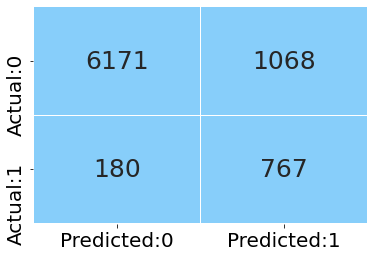

In [ ]:
plot_confusion_matrix(lr_model)

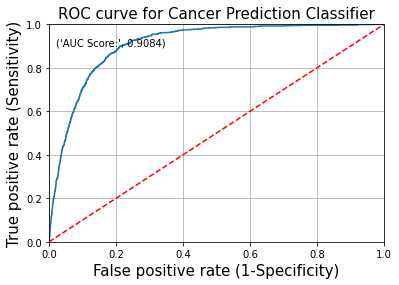

In [ ]:
plot_roc(lr_model)

# KNN

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
tuned_paramaters = {'n_neighbors': np.arange(5, 19, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
 
# instantiate the 'KNeighborsClassifier' 
knn_classification = KNeighborsClassifier( weights = 'distance' )

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the knn model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
# scoring: pass the scoring parameter 'accuracy'
knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'f1',n_jobs=-1)

# fit the model on X_train and y_train using fit()
knn_grid.fit(x_train, y_train)

# get the best parameters
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

Best parameters for KNN Classifier:  {'metric': 'manhattan', 'n_neighbors': 11} 



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   32.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   33.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   35.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   36.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   37.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   38.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5

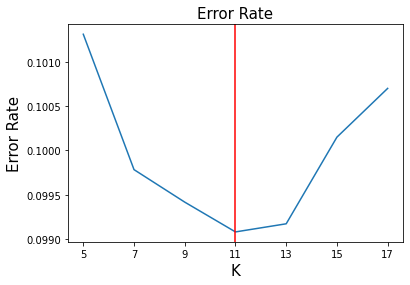

In [ ]:
# consider an empty list to store error rate
error_rate = []

# use for loop to build a knn model for each K
for i in np.arange(5,19,2):
    
    # setup a knn classifier with k neighbors
    # use the 'euclidean' metric 
    knn = KNeighborsClassifier(i, metric = 'manhattan',weights = 'distance')
   
    # fit the model using 'cross_val_score'
    # pass the knn model as 'estimator'
    # use 5-fold cross validation
    score = cross_val_score(knn, x_train, y_train, cv = 5,verbose=True,n_jobs=-1)
    
    # calculate the mean score
    score = score.mean()
    
    # compute error rate 
    error_rate.append(1 - score)

# plot the error_rate for different values of K 
plt.plot(range(5,19,2), error_rate)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Error Rate', fontsize = 15)
plt.xlabel('K', fontsize = 15)
plt.ylabel('Error Rate', fontsize = 15)

# set the x-axis labels
plt.xticks(np.arange(5, 19, step = 2))

# plot a vertical line across the minimum error rate
plt.axvline(x = 11, color = 'red')

# display the plot
plt.show()

In [ ]:
knn_model=KNeighborsClassifier(metric= 'manhattan', n_neighbors= 11,weights = 'distance')
performance_measures(knn_model,x_train,y_train)

Mean Accuracy: 0.9007 (S.D = 0.0033)
Mean F1 score: 0.3758 (S.D = 0.0108)
Mean Auc score: 0.8781 (S.D = 0.0043)


In [ ]:
knn_model=KNeighborsClassifier(metric= 'manhattan', n_neighbors= 11,weights = 'distance')
knn_model.fit(x_train,y_train)

y_pred=knn_model.predict(x_test)
print("train accuracy:",knn_model.score(x_train,y_train))
print("test_accuracy:",metrics.accuracy_score(y_test,y_pred))


train accuracy: 1.0
test_accuracy: 0.8955533838260444


F1 Score= 0.33976833976833976


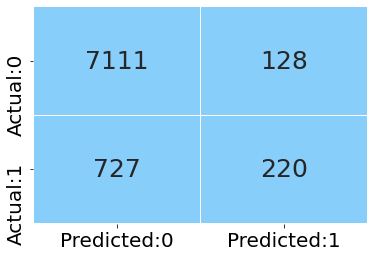

In [ ]:
plot_confusion_matrix(knn_model)

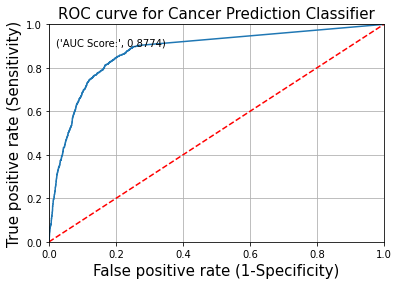

In [ ]:
plot_roc(knn_model)

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
param={"var_smoothing":[1e-9,1e-7,1e-5,1e-3,1e-1,1]}
gnb = GaussianNB()
grid_gnb=GridSearchCV(gnb,cv=5,param_grid=param,scoring="f1")

# fit the model using fit() on train data
grid_gnb.fit(x_train, y_train)
grid_gnb.best_params_

{'var_smoothing': 0.1}

In [ ]:
gnb = GaussianNB(var_smoothing= 0.1)
performance_measures(gnb,x_train,y_train)

Mean Accuracy: 0.8865 (S.D = 0.0031)
Mean F1 score: 0.4619 (S.D = 0.0077)
Mean Auc score: 0.859 (S.D = 0.0024)


In [ ]:

gnb = GaussianNB(var_smoothing= 0.1)

# fit the model using fit() on train data
gnb_model = gnb.fit(x_train, y_train)
print("train accuracy:",gnb_model.score(x_train,y_train))
print("test_accuracy:",gnb_model.score(x_test,y_test))

train accuracy: 0.8869307595980574
test_accuracy: 0.8832152455411678


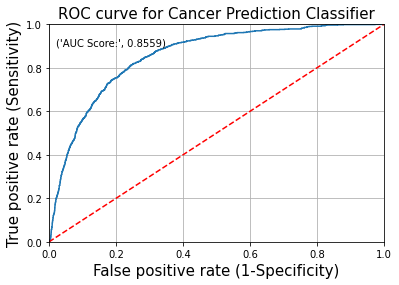

In [ ]:
plot_roc(gnb_model)

F1 Score= 0.44028103044496486


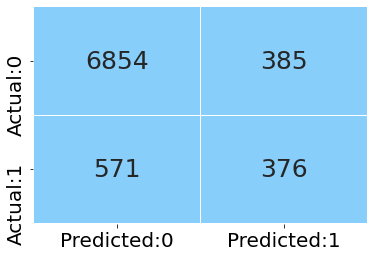

In [ ]:
plot_confusion_matrix(gnb_model)

# Decision tree

In [64]:
df_final_v2=pd.get_dummies(df,drop_first=True)
df_final_v2.head()

,age,balance,day,duration,campaign,previous,Class,job_type_blue-collar,job_type_entrepreneur,job_type_housemaid,job_type_management,job_type_retired,job_type_self-employed,job_type_services,job_type_student,job_type_technician,job_type_unemployed,job_type_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_loan_yes,personal_loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,pdays_not_contacted,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
1,44,29,5,151,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
2,33,2,5,76,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
3,47,1506,5,92,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,33,1,5,198,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1


In [65]:
X_v2=df_final_v2.drop("Class",1)

y_v2=df_final_v2["Class"]
x_train,x_test,y_train,y_test=train_test_split(X_v2,y_v2,test_size=0.2,random_state=1)

In [ ]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth':[8,10,14,17,20],
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': [2,5,9,12,15],
                     'min_samples_leaf': [3,7,10],
                     'max_leaf_nodes': [50,55,60,65,70]}]
 
# instantiate the 'DecisionTreeClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_classification = DecisionTreeClassifier(random_state = 10,class_weight='balanced')

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5,n_jobs=-1,verbose=True,scoring="f1")

# fit the model on X_train and y_train using fit()
tree_grid_model = tree_grid.fit(x_train,y_train)

# get the best parameters
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Fitting 5 folds for each of 1500 candidates, totalling 7500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 888 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done 1588 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done 2488 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 3588 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 4888 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 6388 tasks      | elapsed:  3.5min


Best parameters for decision tree classifier:  {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': 70, 'min_samples_leaf': 3, 'min_samples_split': 15} 



[Parallel(n_jobs=-1)]: Done 7500 out of 7500 | elapsed:  4.1min finished


In [ ]:
dt_model=DecisionTreeClassifier(criterion='gini', max_depth= 20, max_features='sqrt', max_leaf_nodes= 70, min_samples_leaf=3, min_samples_split= 15,class_weight='balanced')
performance_measures(dt_model,x_train,y_train)

Mean Accuracy: 0.7887 (S.D = 0.0321)
Mean F1 score: 0.4496 (S.D = 0.0301)
Mean Auc score: 0.8515 (S.D = 0.0152)


In [ ]:
dt_model=DecisionTreeClassifier(criterion='gini', max_depth= 20, max_features='sqrt', max_leaf_nodes= 70, min_samples_leaf=3, min_samples_split= 15,class_weight='balanced')
dt_model.fit(x_train,y_train)

y_pred=dt_model.predict(x_test)
print("train accuracy:",dt_model.score(x_train,y_train))
print("test_accuracy:",metrics.accuracy_score(y_test,y_pred))


train accuracy: 0.8012583610763263
test_accuracy: 0.7967261177620327


F1 Score= 0.4646074646074646


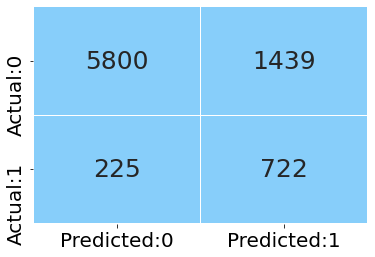

In [ ]:
plot_confusion_matrix(dt_model)

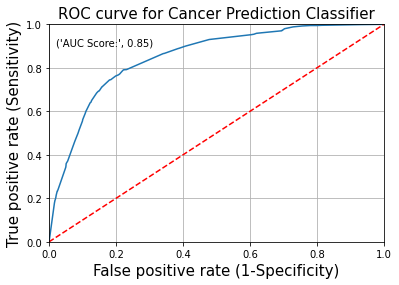

In [ ]:
plot_roc(dt_model)

# RandomForest

In [ ]:
tuned_paramaters = [{'criterion': ['gini'],
                     'n_estimators': [ 50, 70, 90],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8, 11],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8, 11]}]
 
# instantiate the 'RandomForestClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
random_forest_classification = RandomForestClassifier(random_state = 10,class_weight='balanced')

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the random forest classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5,n_jobs=-1,verbose=True,scoring="f1")

# use fit() to fit the model on the train set
rf_grid_model = rf_grid.fit(x_train,y_train)

# get the best parameters
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 17.6min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed: 31.4min finished


Best parameters for random forest classifier:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': 11, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 90} 



In [ ]:
rf_model=RandomForestClassifier(criterion= 'gini', max_depth= 10, max_features= 'log2', max_leaf_nodes= 11, min_samples_leaf= 5, min_samples_split= 2, n_estimators= 90,class_weight='balanced')
performance_measures(rf_model,x_train,y_train)

Mean Accuracy: 0.8021 (S.D = 0.0055)
Mean F1 score: 0.4917 (S.D = 0.0129)
Mean Auc score: 0.8918 (S.D = 0.006)


In [ ]:
rf_model=RandomForestClassifier(criterion= 'gini', max_depth= 10, max_features= 'log2', max_leaf_nodes= 11, min_samples_leaf= 5, min_samples_split= 2, n_estimators= 90,class_weight='balanced')
rf_model.fit(x_train,y_train)

y_pred=rf_model.predict(x_test)
print("train accuracy:",rf_model.score(x_train,y_train))
print("test_accuracy:",metrics.accuracy_score(y_test,y_pred))

train accuracy: 0.8107571546379158
test_accuracy: 0.8157830442218422


F1 Score= 0.5116580310880828


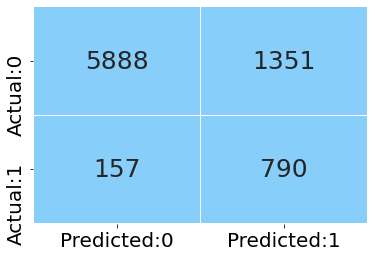

In [ ]:
plot_confusion_matrix(rf_model)

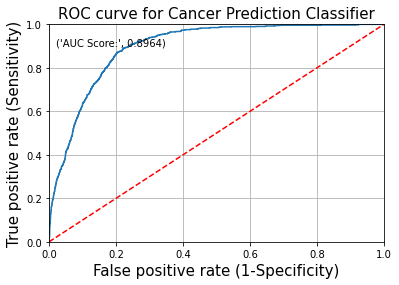

In [ ]:
plot_roc(rf_model)

# xgboost

In [61]:
from xgboost.sklearn import XGBClassifier

In [62]:
weight=int(y_train.value_counts()[0]/y_train.value_counts()[1])
weight

7

In [63]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [66]:
tuning_parameters = {'learning_rate': [ 0.1,0.2, 0.3, 0.4, 0.5],
                     'max_depth': [3,5,8,10],
                     'n_estimators':[10,20,50,100,120],
                     'gamma': [0,1, 2, 3, 4]}

# instantiate the 'XGBClassifier' 
xgb_model = XGBClassifier(scale_pos_weight=weight)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the XGBoost classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 3
# scoring: pass a measure to evaluate the model on test set
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters,scoring="f1", cv = 3,n_jobs=-1,verbose=True)

# fit the model on X_train and y_train using fit()
xgb_grid.fit(x_train, y_train)

# get the best parameters
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 28.9min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 45.2min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 54.0min finished


Best parameters for XGBoost classifier:  {'gamma': 3, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 120} 



In [67]:

xg_model=XGBClassifier(gamma= 3, learning_rate= 0.1, max_depth=10,n_estimators=120,scale_pos_weight=weight)
performance_measures(xg_model,x_train,y_train)

Mean Accuracy: 0.89 (S.D = 0.0057)
Mean F1 score: 0.6154 (S.D = 0.0149)
Mean Auc score: 0.929 (S.D = 0.0044)


In [68]:

#X_train_xg=pd.DataFrame(X_train_v2,columns=x_train.columns)
xg_model=XGBClassifier(gamma= 0, learning_rate= 0.5, max_depth=10,n_estimators=120,scale_pos_weight=weight)
xg_model.fit(x_train,y_train)

#y_pred=xg_model.predict(x_test)
print("train accuracy:",xg_model.score(x_train,y_train))
print("test_accuracy:",xg_model.score(x_test,y_test))

train accuracy: 0.9999389145108579
test_accuracy: 0.8939653066210603


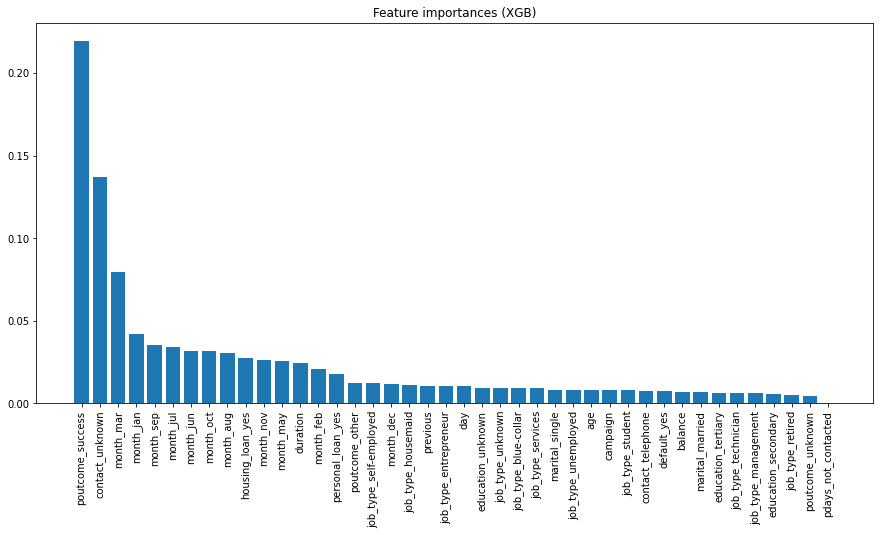

In [69]:
headers = ["name", "score"]
values = sorted(zip(x_train.columns, xg_model.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances
fig = plt.figure(figsize=(15,7))
x_pos = np.arange(0, len(xgb_feature_importances))
plt.bar(x_pos, xgb_feature_importances['score'])
plt.xticks(x_pos, xgb_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (XGB)')

plt.show()

F1 Score= 0.5502590673575128


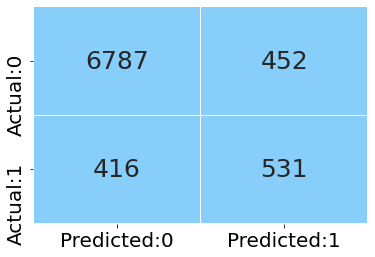

In [72]:
plot_confusion_matrix(xg_model)

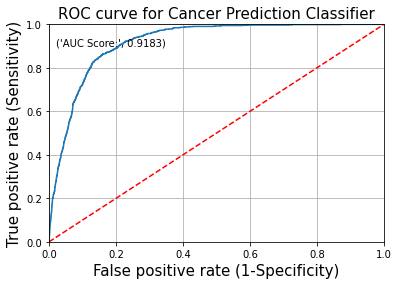

In [73]:
plot_roc(xg_model)

# adaboost

In [74]:
from sklearn.ensemble import AdaBoostClassifier
tuning_parameters = {'learning_rate': [ 0.1,0.2, 0.3, 0.4, 0.5],
                     
                     'n_estimators':[10,20,50,100,120]
                     }

# instantiate the 'XGBClassifier' 
ada_model = AdaBoostClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the XGBoost classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 3
# scoring: pass a measure to evaluate the model on test set
ada_grid = GridSearchCV(estimator = ada_model, param_grid = tuning_parameters, cv = 3,n_jobs=-1,verbose=True,scoring="f1")

# fit the model on X_train and y_train using fit()
ada_grid.fit(x_train, y_train)

# get the best parameters
print('Best parameters for AdaBoost classifier: ', ada_grid.best_params_, '\n')

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   49.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  1.4min finished


Best parameters for AdaBoost classifier:  {'learning_rate': 0.5, 'n_estimators': 120} 



In [75]:
ada_model = AdaBoostClassifier(n_estimators = 120, random_state = 10,learning_rate=0.5)
performance_measures(ada_model,x_train,y_train)

Mean Accuracy: 0.9027 (S.D = 0.0039)
Mean F1 score: 0.459 (S.D = 0.0165)
Mean Auc score: 0.9116 (S.D = 0.0061)


In [76]:

ada_model = AdaBoostClassifier(n_estimators = 120, random_state = 10,learning_rate=0.5)

#fit the model using fit() on train data
ada_model.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.5,
                   n_estimators=120, random_state=10)

In [77]:
y_pred=ada_model.predict(x_test)
print("train accuracy:",ada_model.score(x_train,y_train))
print("test_accuracy:",metrics.accuracy_score(y_test,y_pred))

train accuracy: 0.9040346965578326
test_accuracy: 0.8999511360860005


F1 Score= 0.4507042253521127


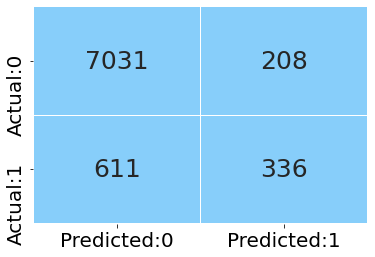

In [78]:
plot_confusion_matrix(ada_model)

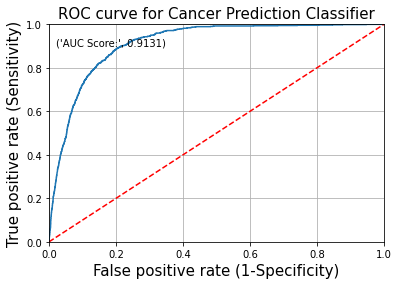

In [79]:
plot_roc(ada_model)

# GradientBoost

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

In [81]:
from sklearn.ensemble import GradientBoostingClassifier
tuning_parameters = {'learning_rate': [ 0.1,0.2, 0.3, 0.4, 0.5],
                     'max_depth': [3,5,8,10],
                     'n_estimators':[10,20,50,100,120]
                     }

# instantiate the 'XGBClassifier' 
gb_model = GradientBoostingClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the XGBoost classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 3
# scoring: pass a measure to evaluate the model on test set
gb_grid = GridSearchCV(estimator = gb_model, param_grid = tuning_parameters, cv = 3,n_jobs=-1,verbose=True,scoring="f1")

# fit the model on X_train and y_train using fit()
gb_grid.fit(x_train, y_train)

# get the best parameters
print('Best parameters for GBoost classifier: ', gb_grid.best_params_, '\n')

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 16.6min finished


Best parameters for GBoost classifier:  {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 120} 



In [82]:
gb_model = GradientBoostingClassifier(n_estimators = 120, random_state = 10,learning_rate=0.1,max_depth=8)
performance_measures(gb_model,x_train,y_train)

Mean Accuracy: 0.9068 (S.D = 0.0045)
Mean F1 score: 0.551 (S.D = 0.0115)
Mean Auc score: 0.9309 (S.D = 0.0062)


In [83]:
gb_model = GradientBoostingClassifier(n_estimators = 120, random_state = 10,learning_rate=0.1,max_depth=8)

#fit the model using fit() on train data
gb_model.fit(x_train, y_train)
y_pred=gb_model.predict(x_test)
print("train accuracy:",gb_model.score(x_train,y_train))
print("test_accuracy:",metrics.accuracy_score(y_test,y_pred))

train accuracy: 0.9715647048043737
test_accuracy: 0.9023943317859761


F1 Score= 0.5302763080540858


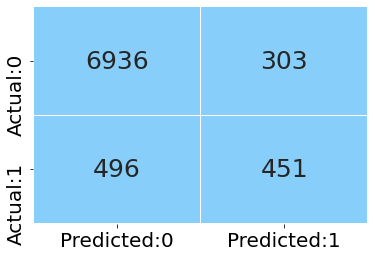

In [84]:
plot_confusion_matrix(gb_model)

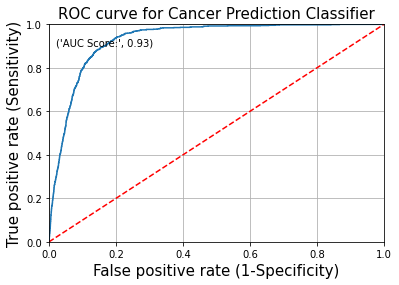

In [85]:
plot_roc(gb_model)

# Stacking

In [86]:
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
level_0 = list()
level_0.append(('lr', LogisticRegression()))
level_0.append(('knn', KNeighborsClassifier(metric= 'manhattan', n_neighbors= 11)))
level_0.append(('cart', DecisionTreeClassifier(criterion='gini', max_depth= 8, max_features='sqrt', max_leaf_nodes= 70, min_samples_leaf=3, min_samples_split= 2,class_weight='balanced')))
level_0.append(('bayes', GaussianNB(var_smoothing= 0.1)))

# define meta learner model
level_1 = LogisticRegression()

# define the stacking ensemble
model = StackingClassifier(estimators=level_0, final_estimator=level_1, cv=5)

In [87]:
performance_measures(model,x_train,y_train)

Mean Accuracy: 0.8985 (S.D = 0.0033)
Mean F1 score: 0.4153 (S.D = 0.018)
Mean Auc score: 0.8796 (S.D = 0.0093)


In [ ]:
scores = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=5, n_jobs=-1, error_score='raise')
np.mean(scores)

0.846203625020545

In [88]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("train accuracy:",model.score(x_train,y_train))
print("test_accuracy:",metrics.accuracy_score(y_test,y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


train accuracy: 0.899880883296173
test_accuracy: 0.8921329098460786


F1 Score= 0.40216655382532157


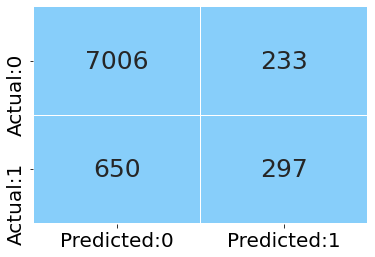

In [89]:
plot_confusion_matrix(model)

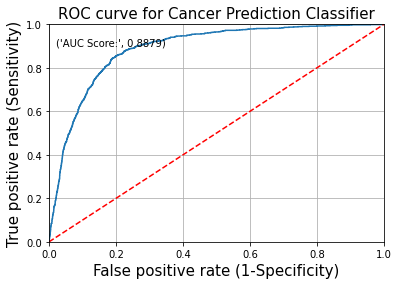

In [90]:
plot_roc(model)